In [1]:
import pandas as pd 

tweets = pd.read_csv('tweets.csv', encoding = "utf-8")

tweets.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [2]:
print('data size:', tweets.shape)

data size: (26747, 2)


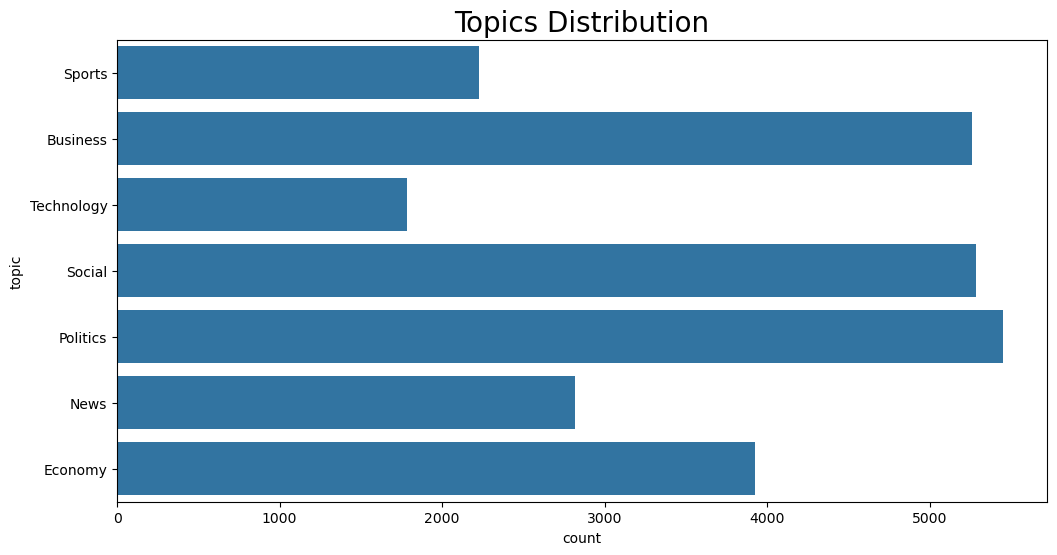

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic')
plt.title('Topics Distribution', fontsize=20)

plt.show()

In [4]:
import string
import re
import nltk

nltk.download('punkt')

nltk.download('stopwords')

from  nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from snowballstemmer import stemmer 

def remove_chars(text, del_chars):
    for char in del_chars:
        text = text.replace(char, "")
    return text

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)

def clean_tweet(tweet):
      
    emoj = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
    
    tweet =  re.sub(emoj, '', tweet)

    
    tweet = re.sub("@[^\s]+","",tweet)
    
    tweet = re.sub("RT","",tweet)
    
    tweet = re.sub(r"(?:\|http?\://|https?\://|www)\S+", "", tweet)
    
    tweet = re.sub(r'[0-9]+', '', tweet)  
    
    tweet = remove_chars(tweet, "٠١٢٣٤٥٦٧٨٩")
 
    
    arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
    
    english_punctuations = string.punctuation
    
    punctuations_list = arabic_punctuations + english_punctuations
    tweet = remove_chars(tweet, punctuations_list)
     
    tweet = remove_repeating_char(tweet)
    
    tweet = tweet.replace('\n', ' ')  
      
    tweet = tweet.strip(' ')  
    return tweet

<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ya313\AppData\Local\Temp\ipykernel_24080\3741167094.py:48: SyntaxWarning: invalid escape sequence '\s'
  tweet = re.sub("@[^\s]+","",tweet)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ya313\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ya313\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def tokenizingText(text):
    token_list = word_tokenize(text)
    return token_list

def filtringText(token_list):
    listStopwords = stopwords.words('arabic')
    filtered = []
    for txt in token_list:
        if txt not in listStopwords:
            filtered.append(txt)
    return filtered

def stemmingText(token_list):
    ar_stemmer = stemmer("arabic")
    token_list = [ar_stemmer.stemWord(word) for word in token_list]
    return token_list

def toSentence(words_list):
    sentence = ' '.join(word for word in words_list)
    return sentence

In [6]:
def process_tweet(tweet):
    
    tweet=clean_tweet(tweet)
    
    token_list=tokenizingText(tweet)
    
    token_list=filtringText(token_list)
    
    token_list=stemmingText(token_list)
    return token_list

In [7]:
text= "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "
#translation is : i love going to the park everyday at 9am with my friends @toto

processed_tweet = process_tweet(text)
print(processed_tweet)

['احب', 'ذهاب', 'حديق', 'يوم', 'صباح', 'رفاق']


In [8]:
tweets['tweet'] = tweets['tweet'].apply(process_tweet)

tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology
...,...,...
26742,"[خير, سحب, مبلغ, الاف, ولم, تخرج, صراف, طريق, ...",Business
26743,"[صرف, ادو, ياخذ, اسبوع, لاسبوع, والادو, باق, ا...",Business
26744,"[جيت, قدم, لاغ, يوم, رقع, اسعار, تطبيق, مشكل, ...",Business
26745,"[حال, توف, مريض, مستشفي, حق, مطالب, ماليه, نرج...",Business


In [9]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

tweets, Y = oversample.fit_resample(tweets, tweets.topic)

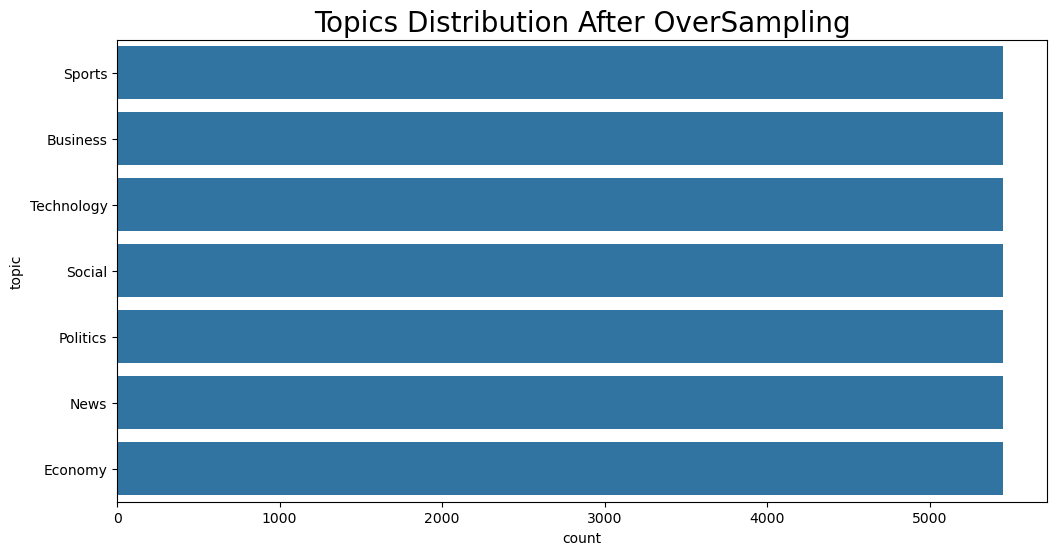

In [10]:
plt.figure(figsize=(12, 6))

sns.countplot(data=tweets, y='topic');
plt.title('Topics Distribution After OverSampling', fontsize=20)

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

le_topics = LabelEncoder()
tweets['topic'] = tweets[['topic']].apply(le_topics.fit_transform)

classes = le_topics.classes_

n_classes = len(classes)
print('No. of classes: ', n_classes)
print('classes: ', classes)
print('Coding: ', le_topics.transform(classes))

No. of classes:  7
classes:  ['Business' 'Economy' 'News' 'Politics' 'Social' 'Sports' 'Technology']
Coding:  [0 1 2 3 4 5 6]


In [12]:
sentences = tweets['tweet'].apply(toSentence)

sentences

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145    تعديل مهم قادم تويتر صفح تصفح تغريد يكون خيار ...
38146                                          ياجمال اخضر
38147    نظر يارت كهرباء iD iD ولكسفاج شدن سعر تبدء الف...
38148                             زر اضاف مسابق مستقبلTECH
38149    فايروس خطير جدا استهدف مستخدم نظام اندرويد قاد...
Name: tweet, Length: 38150, dtype: object

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)
num_words = len(tokenizer.word_counts)
print("Number of words:", num_words)

Number of words: 21984


In [14]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(sentences)

X = tokenizer.texts_to_sequences(sentences)

In [15]:
print(X[0])
print(X[1])

[2937, 48, 1682, 192, 1341, 5516, 2798, 164, 164, 625, 2, 3877, 4150, 164]
[282, 1847, 246, 3878, 3064, 186, 314, 519, 2109, 7472, 157]


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 50

X = pad_sequences(X, maxlen=max_len)
print(X[0])
print(X[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 2937   48 1682  192 1341 5516
 2798  164  164  625    2 3877 4150  164]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0  282 1847  246
 3878 3064  186  314  519 2109 7472  157]


In [17]:
tweets

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",5
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",5
2,"[عذيب, سعر, حال]",0
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",5
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",6
...,...,...
38145,"[تعديل, مهم, قادم, تويتر, صفح, تصفح, تغريد, يك...",6
38146,"[ياجمال, اخضر]",6
38147,"[نظر, يارت, كهرباء, iD, iD, ولكسفاج, شدن, سعر,...",6
38148,"[زر, اضاف, مسابق, مستقبلTECH]",6


In [18]:
y = tweets['topic']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
from keras.models import Sequential

from keras.layers import Embedding, Dense, LSTM

embed_dim = 32
hidden_unit = 16
dropout_rate = 0.2

model = Sequential()

model.add(Embedding(input_dim = max_words, output_dim = embed_dim, input_length = max_len))

model.add(LSTM(units = hidden_unit, dropout=dropout_rate))

model.add(Dense(units = len(classes), activation = 'softmax'))

C:\Users\ya313\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train,
                             epochs=10, batch_size=32,
                             validation_data=(X_test, y_test))

Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5619 - loss: 1.2530 - val_accuracy: 0.8802 - val_loss: 0.4218
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9090 - loss: 0.3203 - val_accuracy: 0.9064 - val_loss: 0.3190
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9503 - loss: 0.1814 - val_accuracy: 0.9141 - val_loss: 0.3061
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9682 - loss: 0.1192 - val_accuracy: 0.9150 - val_loss: 0.3128
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9756 - loss: 0.0875 - val_accuracy: 0.9157 - val_loss: 0.3268
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9805 - loss: 0.0712 - val_accuracy: 0.9150 - val_loss: 0.3421
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9849 - loss: 0.0552 - val_accuracy: 0.9172 - val_loss: 0.3555
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9875 - loss: 0.0475 - val_accuracy: 0.

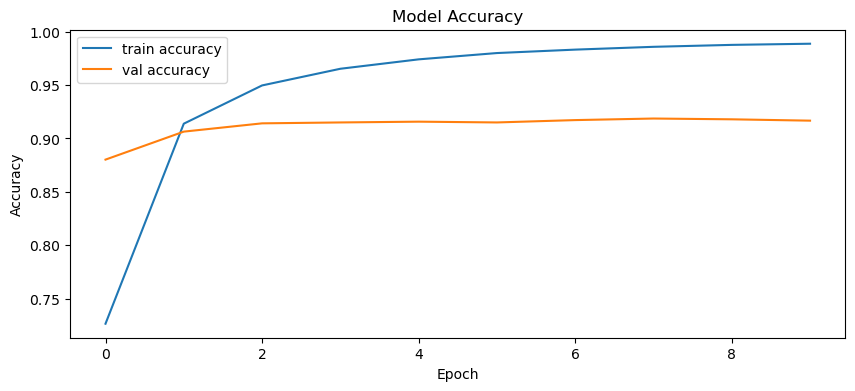

In [23]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')

ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

In [24]:
model.save('personclassifier_model.keras')

import pickle
tokenizer_path = 'perosn_classification_tokenizer'
with open(tokenizer_path, "wb") as file:
    pickle.dump(tokenizer, file)

In [30]:
import numpy as np

def classify_tweet(tweet, model, tokenizer, max_len=50):
    seq = tokenizer.texts_to_sequences([tweet])
    pseq = pad_sequences(seq, maxlen=max_len)
    predictions = model.predict(pseq)
    pred=np.argmax(predictions)
    return pred

In [32]:
from keras.models import load_model
import pickle
classes = ['Buisness', 'Economy', 'News', 'politics', 'Social', 'Sports', 'Technology']

def classify_person(person_name,model_path, tokenizer_path, person_path):
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as file:
        tokenizer =  pickle.load(file)
    df = pd.read_csv(person_path)
    classes_count=dict()
    for i in range(len(classes)):
        key=classes[i]
        classes_count[key]=0
    for _, row in df.iterrows():
        tweet=row['tweet']
        processed_tweet=process_tweet(tweet)
        code=classify_tweet(processed_tweet, model, tokenizer)
        topic=classes[code]
        classes_count[topic]=classes_count[topic]+1
    x = classes_count.keys()
    y = classes_count.values()
    import matplotlib.pyplot as plt
    #pie
    plt.figure(figsize=(5,5))
    plt.title(person_name, fontdict = {'fontsize':20})
    plt.pie(y, labels = x,autopct='%1.1f%%')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

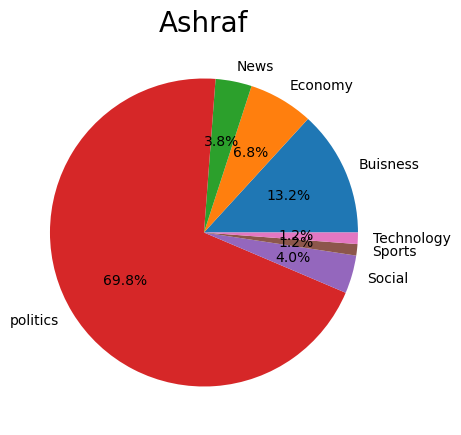

In [34]:
classify_person("Ashraf", 'personclassifier_model.keras',
                'perosn_classification_tokenizer','ashraf.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

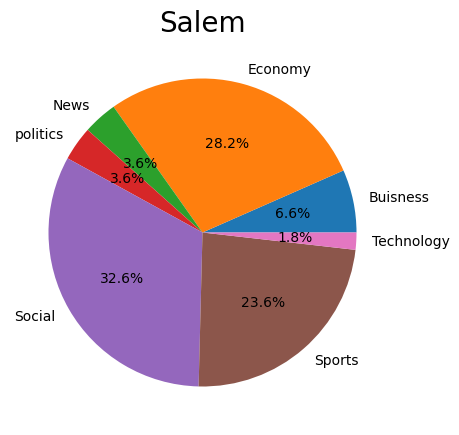

In [40]:
classify_person("Salem", 'personclassifier_model.keras',
                'perosn_classification_tokenizer','salem.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

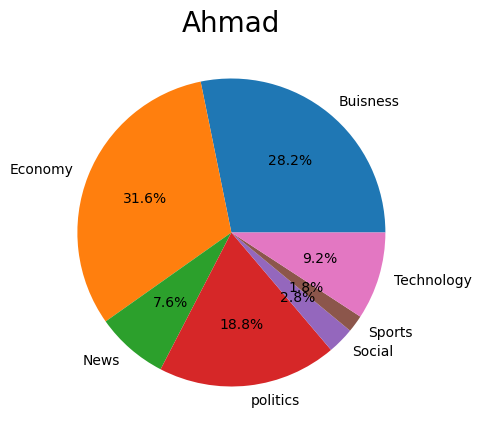

In [44]:
classify_person('Ahmad', 'personclassifier_model.keras',
                'perosn_classification_tokenizer','ahmad.csv')